<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [203]:
import pandas as pd
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.simplefilter(action='ignore', category=UserWarning)

In [205]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [206]:
# текст запроса
query_3_1 = f'''
    select count(*)
    from vacancies
'''

In [207]:
# результат запроса
df_3_1 = pd.read_sql_query(query_3_1, connection)
display(df_3_1.loc[0, 'count'])

49197

2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [208]:
# текст запроса
query_3_2 = f'''
    select count(*)
    from employers
'''

In [209]:
# результат запроса
df_3_2 = pd.read_sql_query(query_3_2, connection)
display(df_3_2.loc[0, 'count'])

23501

3. Посчитате с помощью запроса количество регионов (таблица areas).

In [210]:
# текст запроса
query_3_3 = f'''
    select count(id)
    from areas
'''

In [211]:
# результат запроса
df_3_3 = pd.read_sql_query(query_3_3, connection)
display(df_3_3['count'][0])

1362

4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [212]:
# текст запроса
query_3_4 = f'''
    select count(id)
    from industries
'''

In [213]:
# результат запроса
df_3_4 = pd.read_sql_query(query_3_4, connection)
display(df_3_4['count'][0])

294

***

In [214]:
# выводы по предварительному анализу данных
print(f'''
Количество вакансий в таблице vacancies: {df_3_1.loc[0, 'count']}
Количество работодателей в таблице employers: {df_3_2.loc[0, 'count']}
Количество регионов (городов) в таблице areas: {df_3_3['count'][0]}
Количество сфер деятельности в таблице industries: {df_3_4['count'][0]}
''')


Количество вакансий в таблице vacancies: 49197
Количество работодателей в таблице employers: 23501
Количество регионов (городов) в таблице areas: 1362
Количество сфер деятельности в таблице industries: 294



# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [215]:
# текст запроса
query_4_1 = f'''
    select a.name, count(a.name)
    from vacancies v
    join areas a on v.area_id = a.id
    group by a.name
    order by 2 desc
'''

In [216]:
# результат запроса
df_4_1 = pd.read_sql_query(query_4_1, connection)
display(df_4_1) # Количество вакансий в каждом регионе (городе) по убыванию
display(list((df_4_1['name'][:5]))) # Пятерка лидеров 

,name,count
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892
...,...,...
764,Тарко-Сале,1
765,Новоаннинский,1
766,Бирск,1
767,Сасово,1


['Москва', 'Санкт-Петербург', 'Минск', 'Новосибирск', 'Алматы']

2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [217]:
# текст запроса
query_4_2 = f'''
    select count(*)
    from vacancies
    where salary_from is not null or salary_to is not null
'''

In [218]:
# результат запроса
df_4_2 = pd.read_sql_query(query_4_2, connection)
display(df_4_2['count'][0])

24073

3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [219]:
# текст запроса
query_4_3 = f'''
    select 
        round(avg(salary_from)) avg_salfrom, 
        round(avg(salary_to)) avg_salto
    from vacancies
'''

In [220]:
# результат запроса
df_4_3 = pd.read_sql_query(query_4_3, connection)
display(int(df_4_3['avg_salfrom'][0])) # Среднее значение для нижней границы зарплатной вилки
display(int(df_4_3['avg_salto'][0])) # Среднее значение для верхней границы зарплатной вилки

71065

110537

4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [221]:
# текст запроса
query_4_4 = f'''
    select
        schedule,
        employment,
        count(id)
    from vacancies
    group by schedule, employment
    order by 3 desc
'''

In [222]:
# результат запроса
df_4_4 = pd.read_sql_query(query_4_4, connection)
display(df_4_4) # Результат запроса
display(list(df_4_4.iloc[1][['schedule', 'employment']])) # Пара на 2 месте по популярности

,schedule,employment,count
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


['Удаленная работа', 'Полная занятость']

5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [223]:
# текст запроса
query_4_5 = f'''
    select experience
    from vacancies
    group by experience
    order by count(id)
'''

In [224]:
# результат запроса
df_4_5 = pd.read_sql_query(query_4_5, connection)
display(df_4_5) # Выводит значения поля Требуемый опыт работы (experience) в порядке возрастания
display(list(df_4_5['experience'])) # Альтернативное представление в виде списка

,experience
0,Более 6 лет
1,Нет опыта
2,От 3 до 6 лет
3,От 1 года до 3 лет


['Более 6 лет', 'Нет опыта', 'От 3 до 6 лет', 'От 1 года до 3 лет']

In [225]:
df_4_5['experience'].iloc[-1].lower()

'от 1 года до 3 лет'

***


1. Пятерка лидеров регионов (городов) по количеству вакансий: ['Москва', 'Санкт-Петербург', 'Минск', 'Новосибирск', 'Алматы']
2. Общее количество вакансий, в которых есть часть з/п вилки: 24073
3. Среднее значение нижней и верхней границы з/п вилки: 71065 и 110537 соответственно
4. Самое популярное сочетание количества типа рабочего графика (schedule) и типа трудоустройства (employment): ['Удаленная работа', 'Полная занятость'], а самое непопулярное: ['Сменный график', 'Проектная работа'] исходя из графика представленного ниже
5. Ну а самый популярный опыт работы это от 1 года до 3 лет



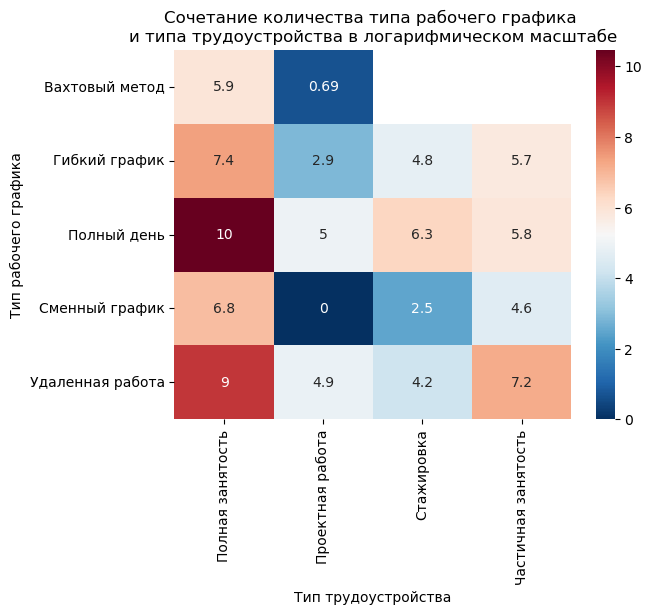

In [226]:
# выводы по детальному анализу вакансий
df_4_4_log = df_4_4.copy()
df_4_4_log['count'] = np.log(df_4_4_log['count']) 
df_4_4_pivot = df_4_4_log.pivot('schedule', 'employment', 'count').round(2)
df_4_4_heatmap = sns.heatmap(df_4_4_pivot, annot=True, cmap='RdBu_r')
df_4_4_heatmap.set_title('Сочетание количества типа рабочего графика \nи типа трудоустройства в логарифмическом масштабе')
df_4_4_heatmap.set_xlabel('Тип трудоустройства')
df_4_4_heatmap.set_ylabel('Тип рабочего графика')
print(f'''
1. Пятерка лидеров регионов (городов) по количеству вакансий: {list((df_4_1['name'][:5]))}
2. Общее количество вакансий, в которых есть часть з/п вилки: {df_4_2['count'][0]}
3. Среднее значение нижней и верхней границы з/п вилки: {int(df_4_3['avg_salfrom'][0])} и {int(df_4_3['avg_salto'][0])} соответственно
4. Самое популярное сочетание количества типа рабочего графика (schedule) и типа трудоустройства (employment): {list(df_4_4.iloc[1][['schedule', 'employment']])}, \
а самое непопулярное: {list(df_4_4.iloc[-1][['schedule', 'employment']])} исходя из графика представленного ниже
5. Ну а самый популярный опыт работы это {df_4_5['experience'].iloc[-1].lower()}
''')

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [227]:
# текст запроса
query_5_1 = f'''
    select e.name
    from vacancies v
    join employers e on v.employer_id = e.id
    group by e.name
    order by count(e.name) desc
    limit 5
'''


In [228]:
# результат запроса
df_5_1 = pd.read_sql_query(query_5_1, connection)
display(list(df_5_1.iloc[0]) + list(df_5_1.iloc[4]))


['Яндекс', 'Газпром нефть']

2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [229]:
# текст запроса
query_5_2 = f'''
    select a.name AREAS, count(e.id) count_EMPLOYERS, count(v.id) count_VACANCIES
    from areas a
    left join vacancies v on a.id = v.area_id
    left join employers e on a.id = e.area
    where v.id is null
    group by a.name    
    order by 2 desc
    limit 1    
'''

In [230]:
# результат запроса
df_5_2 = pd.read_sql_query(query_5_2, connection)
display(df_5_2['areas'][0])

'Россия'

3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [231]:
# текст запроса
query_5_3 = f'''
    select
        e.name employers,
        count(distinct(v.area_id)) 
    from vacancies v
    join employers e on v.employer_id = e.id    
    group by e.id
    order by 2 desc
'''

In [232]:
# результат запроса
df_5_3 = pd.read_sql_query(query_5_3, connection)
display(df_5_3)
# Код для ответа на задание
# display(df_5_3['count'][0])

,employers,count
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
14901,НПП Авиатрон,1
14902,Центр дистанционных торгов,1
14903,Городские Телекоммуникационные Системы,1
14904,"Введенский, Отель",1


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [233]:
# текст запроса
query_5_4 = f'''
    select count(e.id) 
    from employers e
    left join employers_industries ei on e.id = ei.employer_id
    where ei.industry_id is null
'''

In [234]:
# результат запроса
df_5_4 = pd.read_sql_query(query_5_4, connection)
display(df_5_4['count'][0])

8419

5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [235]:
# текст запроса
query_5_5 = f'''
    select e.name, count(ei.industry_id)
    from employers e
    left join employers_industries ei on e.id = ei.employer_id
    group by e.id
    having count(ei.industry_id) = 4
    order by 1
    offset 2
    limit 1
'''

In [236]:
# результат запроса
df_5_5 = pd.read_sql_query(query_5_5, connection)
display(df_5_5['name'][0])

'2ГИС'

6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [237]:
# текст запроса
query_5_6 = f'''
    select count(ei.employer_id)
    from employers_industries ei
    left join industries i on ei.industry_id = i.id
    where i.name = 'Разработка программного обеспечения'
'''

In [238]:
# результат запроса
df_5_6 = pd.read_sql_query(query_5_6, connection)
display(df_5_6['count'][0])

3553

7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [239]:
# код для получения списка городов-милионников
url = 'https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8#%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D0%B3%D0%BE%D1%80%D0%BE%D0%B4%D0%BE%D0%B2-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D0%BE%D0%B2'
table = pd.read_html(url, encoding='utf-8')[1]['Город']
clean_table = [] # Избавляется от '[a]' и получаем список автоматизированно, при желании можно было использовать регулярные выражения
for i in table:
    if '[a]' in i:
        clean_table.append(i[0:-3])
    else:
        clean_table.append(i)

In [240]:
# текст запроса
query_5_7 = f'''
    select a.name areas, count(v.id)
    from vacancies v
    join areas a on a.id = v.area_id
    join employers e on e.id = v.employer_id
    where e.name = 'Яндекс' and a.name in {tuple(clean_table)}
    group by a.id      
    
    union all
    select 'Total', count(*)
    from vacancies v
    join areas a on a.id = v.area_id
    join employers e on e.id = v.employer_id
    where e.name = 'Яндекс' and a.name in {tuple(clean_table)}
    order by count 
'''

In [241]:
# результат запроса
df_5_7 = pd.read_sql_query(query_5_7, connection)
display(df_5_7)
display(f'''Количество строк: {df_5_7.shape[0]} и результат в строке Total: {df_5_7['count'].iloc[-1]}''')


,areas,count
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Казань,25
6,Ростов-на-Дону,25
7,Самара,26
8,Уфа,26
9,Краснодар,30


'Количество строк: 17 и результат в строке Total: 485'

***

In [242]:
# выводы по анализу работодателей
print(f'''
1. По общему количеству вакансий на 1 месте находится {df_5_1.iloc[0]['name']}, а на 5 месте находится {df_5_1.iloc[4]['name']}.
2. {df_5_2['areas'][0]} - это регион (страна), в котором наибольшее количество работодателей без вакансий.
3. {df_5_3['employers'][0]} это работодатель, который имеет наибольшее количество вакансий в {df_5_3['count'][0]} регионах.
4. Общее количество работодателей без сферы деятельности: {df_5_4['count'][0]}.
5. {df_5_5['name'][0]} - это компания, находящаяся на 3 месте в алфавитном списке компаний, у которой 4 сферы деятельности.
6. Общее количество работодателей, у которых сфера деятельности 'Разработка программного обеспечения', состоявляет {df_5_6['count'][0]}.
7. В компании 'Яндекс' из {len(clean_table)} городов-миллионников имеется {df_5_7['count'].iloc[-1]} вакансий.
''')


1. По общему количеству вакансий на 1 месте находится Яндекс, а на 5 месте находится Газпром нефть.
2. Россия - это регион (страна), в котором наибольшее количество работодателей без вакансий.
3. Яндекс это работодатель, который имеет наибольшее количество вакансий в 181 регионах.
4. Общее количество работодателей без сферы деятельности: 8419.
5. 2ГИС - это компания, находящаяся на 3 месте в алфавитном списке компаний, у которой 4 сферы деятельности.
6. Общее количество работодателей, у которых сфера деятельности 'Разработка программного обеспечения', состоявляет 3553.
7. В компании 'Яндекс' из 16 городов-миллионников имеется 485 вакансий.



# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [243]:
# текст запроса
query_6_1 = f'''
    select count(name)
    from vacancies
    where lower(name) like '%data%' or lower(name) like '%данн%'
'''

In [244]:
# результат запроса
df_6_1 = pd.read_sql_query(query_6_1, connection)
df_6_1
display(df_6_1['count'][0])

1771

2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [245]:
# текст запроса
query_6_2 = '''
    select count(*)
    from vacancies
    where name not ilike '%HTML%'
        and (name ilike any ('{%data scientist%, %data science%, %исследователь данных%, %machine learning%, %машинн%обучен%}') 
            or name like '%ML%')
        and (name ilike '%junior%'
            or experience ilike '%Нет опыта%'
            or employment ilike '%Стажировка%')
'''

In [246]:
# результат запроса
df_6_2 = pd.read_sql_query(query_6_2, connection)
display(df_6_2['count'][0])

51

3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [247]:
# текст запроса
query_6_3 = '''
    select count(*)
    from vacancies
    where name not ilike '%HTML%'
        and (name ilike any ('{%data scientist%, %data science%, %исследователь данных%, %machine learning%, %машинн%обучен%}') 
            or name like '%ML%')
        and (key_skills ilike '%SQL%' or key_skills ilike '%postgres%')
'''

In [248]:
# результат запроса
df_6_3 = pd.read_sql_query(query_6_3, connection)
display(df_6_3['count'][0])

201

4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [249]:
# текст запроса
query_6_4 = '''
    select count(*)
    from vacancies
    where name not ilike '%HTML%'
        and (name ilike any ('{%data scientist%, %data science%, %исследователь данных%, %machine learning%, %машинн%обучен%}') 
            or name like '%ML%')
        and key_skills ilike '%Python%'
'''

In [250]:
# результат запроса
df_6_4 = pd.read_sql_query(query_6_4, connection)
display(df_6_4['count'][0])

351

5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [251]:
# текст запроса
# Здесь согласен, строку select читать тяжело без цветовой дифференциации скобок, но смысл тут следующий:
# округление до 2 знака после точки(
#   посчет среднего(
#       длина строки(key_skills) - длина строки(замена табуляции '/t' на ничто в строке (key_skills))
#       +1 key_skills который не учитывался по разделителю табуляции
#   ))

query_6_5 = '''
    select round(avg(length(key_skills) - length(replace(key_skills, CHR(9), '')) +1), 2)
    from vacancies
    where name not ilike '%HTML%'
        and (name ilike any ('{%data scientist%, %data science%, %исследователь данных%, %machine learning%, %машинн%обучен%}') 
            or name like '%ML%')
        and key_skills is not null
'''

In [252]:
# результат запроса
df_6_5 = pd.read_sql_query(query_6_5, connection)
df_6_5['round'][0]

6.41

6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [253]:
# текст запроса
query_6_6 = '''
    select experience, round(avg(coalesce((salary_from+salary_to)/2, salary_from, salary_to)), 0) avg_sal
    from vacancies
    where name not ilike '%HTML%'
        and (name ilike any ('{%data scientist%, %data science%, %исследователь данных%, %machine learning%, %машинн%обучен%}') 
            or name like '%ML%')
    group by experience        
'''

In [254]:
# результат запроса
df_6_6 = pd.read_sql_query(query_6_6, connection)
display(df_6_6)
print(f'''Дата-сайентист с опытом работы от 3 до 6 лет может расчитывать на зарплату в среднем {df_6_6[df_6_6['experience'] == 'От 3 до 6 лет']['avg_sal'].iloc[0]} денег''')

,experience,avg_sal
0,Более 6 лет,NaN
1,Нет опыта,74643.0
2,От 1 года до 3 лет,139675.0
3,От 3 до 6 лет,243115.0


Дата-сайентист с опытом работы от 3 до 6 лет может расчитывать на зарплату в среднем 243115.0 денег


***

In [255]:
# выводы по предметному анализу
print(f'''
1. Общее количество вакансий, которые имеют отношение к данным, состовляет {df_6_1['count'][0]}.
2. {df_6_2['count'][0]} - это количество вакансий дата-сайентиста уровня junior.
3. Количество вакансий для DS, в которых в качестве ключевого навыка указан SQL/postgres: {df_6_3['count'][0]}.
4. {df_6_4['count'][0]} именно настолько популярен Python в требованиях работодателей к DS.
5. В среднем от DS требуют {df_6_5['round'][0]} ключевых навыков.
6. Начинающий DS без опыта работы может расчитывать на з/п в среднем от {df_6_6[df_6_6['experience'] == 'Нет опыта']['avg_sal'].iloc[0]} денег, \
в то время как более продвинутые DS с опытом работы от 3 до 6 лет могут расчитывать на з/п в среднем {df_6_6[df_6_6['experience'] == 'От 3 до 6 лет']['avg_sal'].iloc[0]} денег.
''')


1. Общее количество вакансий, которые имеют отношение к данным, состовляет 1771.
2. 51 - это количество вакансий дата-сайентиста уровня junior.
3. Количество вакансий для DS, в которых в качестве ключевого навыка указан SQL/postgres: 201.
4. 351 именно настолько популярен Python в требованиях работодателей к DS.
5. В среднем от DS требуют 6.41 ключевых навыков.
6. Начинающий DS без опыта работы может расчитывать на з/п в среднем от 74643.0 денег, в то время как более продвинутые DS с опытом работы от 3 до 6 лет могут расчитывать на з/п в среднем 243115.0 денег.



# Общий вывод по проекту

In [256]:
# подведем итог исследования, обобщите выводы
# 1. Предварительный анализ данных:
#   Общее количество: вакансий - 49197, работодателей - 23501, регионов - 1362, сфер деятельности - 294
# 2. Детальный анализ вакансий:
#   Пятерка лидеров регионов (городов) по количеству вакансий: ['Москва', 'Санкт-Петербург', 'Минск', 'Новосибирск', 'Алматы']
#   Из 24073 вакансий среднее значение нижней и верхней границы з/п вилки: 71065 и 110537 соответственно, 
#   Больше всего работодатели предпочитают кандидатов с опытом работы от 1 года до 3 лет с удаленной работой и полной занятостью
# 3. Анализ работодателей:
#   Яндекс набирает больше всех сотрудников в 181 регионах, а из 16 городах-миллионников ищет 485 сотрудников.
#   В России много работодателей без вакансий (что логично).
#   Общее количество работодателей без сферы деятельности: 8419, а 2ГИС имеет целых 4
#   Разработкой программного обеспечения занимается 3553 работодателя.
# 4. Предметный анализ: из 1771 вакансий, имеющих отношение к данным, работодатели ищут
#   51 DS уровня junior, 201 DS с навыком SQL/postgres или 351 с навыком Python.
#   DS с навыками от 6 до 7 в среднем
#   Начинающих DS без опыта с з/п 74643 денег, а опытных 3-6 лет с з/п 243115 денег.

 

# здесь можно (это будет плюсом) провести дополнительные исследования данных, сделать прогнозы, продумать варианты продолжения исследования


In [257]:
# Прогнозы делать не умеем, а вот акцентировать внимание на регионах по з/п DS - это пожалуйста
# 
# Таблица з/п
# 
# Создадим список c данными DS и возьмем копию с предыдущего задания для использования f-строк и удобства
list_ds = ['%data scientist%', '%data science%', '%исследователь данных%', '%machine learning%', '%машинн%обучен%']
city_list = clean_table.copy()
# Запрос в sql
query_7_1 = f'''
    select a.name area, v.experience, avg(v.salary_from) avg_sf, avg(v.salary_to) avg_st
    from vacancies v
    left join areas a on v.area_id = a.id
    
    where v.name not ilike '%HTML%'
        and (v.name ilike any (array{list_ds}) 
            or v.name like '%ML%')
        and a.name in {tuple(city_list)}
    group by a.name, v.experience 
'''
# Перевод в DF
df_7_1 = pd.read_sql_query(query_7_1, connection)

# Приведение в человеко-читаемый вид и округление
df_7_1 = df_7_1.pivot('area', 'experience', ['avg_sf', 'avg_st']).round()
# Удаляем пустые строки
df_7_1 = df_7_1.dropna(axis=0, thresh=1)
display(df_7_1)
# Отсюда делаем вывод, что наш вариант работы DS без опыта работы только в 3 городах-миллионнике с з/п от 45к до 124к,
# а с опытом работы от 1 года до 3 лет уже поинтереснее, это уже 6 городов, с з/п от 50к до 210к. 

avg_sf                                             \
experience      Более 6 лет Нет опыта От 1 года до 3 лет От 3 до 6 лет   
area                                                                     
Екатеринбург            NaN       NaN           150000.0           NaN   
Казань                  NaN       NaN            50000.0           NaN   
Москва                  NaN   45000.0           142083.0      201818.0   
Новосибирск             NaN   60000.0                NaN      209500.0   
Пермь                   NaN       NaN            50000.0           NaN   
Ростов-на-Дону          NaN       NaN            50000.0           NaN   
Санкт-Петербург         NaN   65000.0           175346.0      250000.0   
Уфа                     NaN       NaN                NaN           NaN   

                     avg_st                                             
experience      Более 6 лет Нет опыта От 1 года до 3 лет От 3 до 6 лет  
area                                                                    
Екатеринбург            NaN   37000.0           185000.0           NaN  
Казань                  NaN       NaN                NaN           NaN  
Москва                  NaN  100000.0           210182.0      351111.0  
Новосибирск             NaN  100000.0                NaN           NaN  
Пермь                   NaN       NaN            80000.0           NaN  
Ростов-на-Дону          NaN       NaN                NaN           NaN  
Санкт-Петербург         NaN  124000.0           175000.0      400000.0  
Уфа                     NaN       NaN            90000.0           NaN

In [258]:
# Чуть более подробно рассмотрим вакансии DS с 'Нет опыта' в города-миллионниках

# Запрос в sql с использованием предыдущих списков
query_7_2 = f'''
    select a.name area, count(v.id) count_vac, avg(v.salary_from) avg_sf, avg(v.salary_to) avg_st
    from vacancies v
    left join areas a on v.area_id = a.id
    
    where v.name not ilike '%HTML%'
        and (v.name ilike any (array{list_ds}) 
            or v.name like '%ML%')
        and a.name in {tuple(city_list)}
        and v.experience = 'Нет опыта'
    group by a.name
    order by 2 desc
'''

df_7_2 = pd.read_sql_query(query_7_2, connection)
display(df_7_2)
# Исходя из таблицы делаем выводы, 
# 1. Москва и Санкт-Петербург - это лидеры по количеству вакансий (всего 16 на 2 города) и средней вилки з/п
# 2. Новосибирск дышит им в затылок с 3 вакансиями и средней вилкой з/п от 60к до 100к
# 3. Остальные работодатели из 5 городов-миллионников по 1-2 вакансии на город пытаюся понять, что это за зверь такой DS без опыта работы и зачем он нужен.

# Общий вывод: DS без опыта работы нужен работодателям скорее всего в качестве эксперимента по выращиванию своего DS под свои задачи. 

,area,count_vac,avg_sf,avg_st
0,Москва,10,45000.0,100000.0
1,Санкт-Петербург,6,65000.0,124000.0
2,Новосибирск,3,60000.0,100000.0
3,Екатеринбург,2,NaN,37000.0
4,Казань,1,NaN,NaN
5,Воронеж,1,NaN,NaN
6,Омск,1,NaN,NaN
7,Пермь,1,NaN,NaN


In [259]:
# Завершаем сеанс
connection.close()